# Project

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
path_prefix = "/Users/sarahdelaney/Downloads/"

In [10]:
hemmorrhage_labels= pd.read_csv( "hemorrhage-labels.csv")
hemmorrhage_labels.head()
hemmorrhage_labels.loc[hemmorrhage_labels_df["Image"] == "ID_d4f2436e1"]

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
626609,ID_d4f2436e1,1,1,0,0,0,0


In [21]:
epidural_results = pd.read_csv(path_prefix + "Hemorrhage Segmentation Project/Results_Epidural.csv")
epidural_results.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN
1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN
2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN
3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN
4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN


In [56]:
segmented_epidural_images = epidural_results['Origin'].values

/Users/sarahdelaney/Downloads/render/epidural/max_contrast_window/ID_2b08cda21.jpg


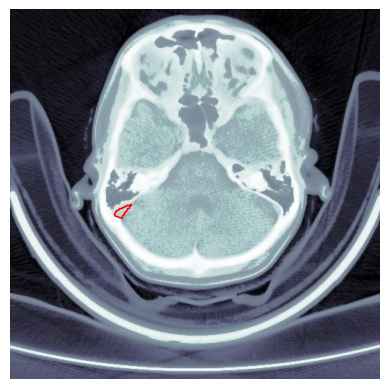

In [88]:
# first dowload just epidural/max_contrast_window images that have segmentations
epidural_max_contrast = []
for dirname, _, filenames in os.walk(path_prefix + 'render/epidural/max_contrast_window'):
    for filename in filenames:
        if filename in segmented_epidural_images:
            epidural_max_contrast.append(os.path.join(dirname, filename))

# plot random image
filename = epidural_max_contrast[5]
print(filename)
ct_scan_image = np.array(Image.open(filename))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the CT scan image
ax.imshow(ct_scan_image, cmap='gray')

# try to get the segmentation
base_filename = os.path.basename(filename)
# Filter the DataFrame based on the 'Origin' column
filtered_df = epidural_results.loc[epidural_results['Origin'] == base_filename]

# Get the value of 'Correct Label' column, if NaN, get value from 'Majority Label'
correct_label_value = filtered_df['Correct Label'].iloc[0]
if pd.isnull(correct_label_value):
    correct_label_value = filtered_df['Majority Label'].iloc[0]
correct_label_value = json.loads(correct_label_value)

vertices = [(point['x'] * ct_scan_image.shape[1], point['y'] * ct_scan_image.shape[0]) for point in correct_label_value]
polygon_patch = patches.Polygon(vertices, closed=True, edgecolor='red', linewidth=1, fill=False)
ax.add_patch(polygon_patch)

# Show the plot
plt.axis('off')
plt.show()

In [12]:
# Define conditions for categorizing the hemorrhage cases
hemorrhage_conditions = [
    # Condition for 'multiple' hemorrhage types
    hemmorrhage_labels[['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']].sum(axis=1) > 1,   # 6
    hemmorrhage_labels['epidural'].eq(1),   # 1
    hemmorrhage_labels['intraparenchymal'].eq(1),   # 2
    hemmorrhage_labels['intraventricular'].eq(1),   # 3
    hemmorrhage_labels['subarachnoid'].eq(1),   # 4
    hemmorrhage_labels['subdural'].eq(1),   # 5
]

# Define the corresponding output codes for each condition
hemorrhage_categories = [6, 1, 2, 3, 4, 5]

# Apply the conditions to assign categories using np.select
category_assignment = np.select(hemorrhage_conditions, hemorrhage_categories, default=0)
category_assignment_series = pd.Series(category_assignment, name="category")

# Merge the category assignments with the original labels
labeled_hemorrhage_data = pd.concat([hemmorrhage_labels, category_assignment_series], axis=1)
labeled_hemorrhage_data['Image'] = labeled_hemorrhage_data['Image'] + '.jpg'

# Display the updated DataFrame with categories and filenames
display(labeled_hemorrhage_data)

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,category
0,ID_000012eaf.jpg,0,0,0,0,0,0,0
1,ID_000039fa0.jpg,0,0,0,0,0,0,0
2,ID_00005679d.jpg,0,0,0,0,0,0,0
3,ID_00008ce3c.jpg,0,0,0,0,0,0,0
4,ID_0000950d7.jpg,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
752798,ID_ffff82e46.jpg,0,0,0,0,0,0,0
752799,ID_ffff922b9.jpg,1,0,0,1,0,0,3
752800,ID_ffffb670a.jpg,1,0,0,0,1,0,4
752801,ID_ffffcbff8.jpg,0,0,0,0,0,0,0


In [13]:
import glob, os

test = []
imagedir = []
imagename = []
c = 0

for filename in glob.iglob( 'renders/**', recursive=True):
    if os.path.isfile(filename):
        test.append(filename)
        dirname, basename = os.path.split(test[c])
        imagedir.append(dirname+'/'+basename)
        imagename.append(basename)
        c += 1 # filter dirs
img = pd.DataFrame([imagedir, imagename], index=['image_path', 'Image']).T.explode('Image')
display(img)

,image_path,Image
0,renders/ID_000012eaf.jpg,ID_000012eaf.jpg
1,renders/ID_000039fa0.jpg,ID_000039fa0.jpg
2,renders/ID_00005679d.jpg,ID_00005679d.jpg
3,renders/ID_00008ce3c.jpg,ID_00008ce3c.jpg
4,renders/ID_0000950d7.jpg,ID_0000950d7.jpg
...,...,...
116527,renders/ID_fffc60817.jpg,ID_fffc60817.jpg
116528,renders/ID_fffd00949.jpg,ID_fffd00949.jpg
116529,renders/ID_fffe2edb8.jpg,ID_fffe2edb8.jpg
116530,renders/ID_ffff922b9.jpg,ID_ffff922b9.jpg


In [14]:
# Merge the unique image DataFrame with the labels DataFrame
labels_with_paths = pd.merge(img, labeled_hemorrhage_data, on=["Image"], how="right")
# Drop duplicates based on the 'Image' column to ensure unique entries
unique_labels_with_paths = labels_with_paths.drop_duplicates(subset="Image")
# Reset the index of the resulting DataFrame
unique_labels_with_paths.reset_index(drop=True, inplace=True)
# Display the resulting DataFrame
display(unique_labels_with_paths)

,image_path,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,category
0,renders/ID_000012eaf.jpg,ID_000012eaf.jpg,0,0,0,0,0,0,0
1,renders/ID_000039fa0.jpg,ID_000039fa0.jpg,0,0,0,0,0,0,0
2,renders/ID_00005679d.jpg,ID_00005679d.jpg,0,0,0,0,0,0,0
3,renders/ID_00008ce3c.jpg,ID_00008ce3c.jpg,0,0,0,0,0,0,0
4,renders/ID_0000950d7.jpg,ID_0000950d7.jpg,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
752798,NaN,ID_ffff82e46.jpg,0,0,0,0,0,0,0
752799,renders/ID_ffff922b9.jpg,ID_ffff922b9.jpg,1,0,0,1,0,0,3
752800,renders/ID_ffffb670a.jpg,ID_ffffb670a.jpg,1,0,0,0,1,0,4
752801,NaN,ID_ffffcbff8.jpg,0,0,0,0,0,0,0


In [15]:
clabels = unique_labels_with_paths.dropna()
clabels.reset_index(drop = True, inplace = True)
display(clabels)

,image_path,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,category
0,renders/ID_000012eaf.jpg,ID_000012eaf.jpg,0,0,0,0,0,0,0
1,renders/ID_000039fa0.jpg,ID_000039fa0.jpg,0,0,0,0,0,0,0
2,renders/ID_00005679d.jpg,ID_00005679d.jpg,0,0,0,0,0,0,0
3,renders/ID_00008ce3c.jpg,ID_00008ce3c.jpg,0,0,0,0,0,0,0
4,renders/ID_0000950d7.jpg,ID_0000950d7.jpg,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
116527,renders/ID_fffc60817.jpg,ID_fffc60817.jpg,1,0,1,1,0,0,6
116528,renders/ID_fffd00949.jpg,ID_fffd00949.jpg,1,0,0,0,1,0,4
116529,renders/ID_fffe2edb8.jpg,ID_fffe2edb8.jpg,1,0,1,1,0,0,6
116530,renders/ID_ffff922b9.jpg,ID_ffff922b9.jpg,1,0,0,1,0,0,3


In [16]:
import random

# Seed the random number generator for reproducibility
random.seed(42)

# Create lists of images and their corresponding categories from the DataFrame
image_filenames = list(clabels.Image)
categories = list(clabels.category)

# Lists to categorize images by type
no_hemorrhage_images = []
epidural_images = []
intraparenchymal_images = []
intraventricular_images = []
subarachnoid_images = []
subdural_images = []
multiple_types_images = []

# Categorize images into lists based on their hemorrhage type
for index in range(len(categories)):
    category = categories[index]
    image_filename = image_filenames[index]
    
    if category == 0:
        no_hemorrhage_images.append(image_filename)
    elif category == 1:
        epidural_images.append(image_filename)
    elif category == 2:
        intraparenchymal_images.append(image_filename)
    elif category == 3:
        intraventricular_images.append(image_filename)
    elif category == 4:
        subarachnoid_images.append(image_filename)
    elif category == 5:
        subdural_images.append(image_filename)
    elif category == 6:
        multiple_types_images.append(image_filename)
    
# Randomly sample images from each category to create a balanced dataset
sample_no_hemorrhage = random.sample(no_hemorrhage_images, k=50)
sample_epidural = random.sample(epidural_images, k=50)
sample_intraparenchymal = random.sample(intraparenchymal_images, k=50)
sample_intraventricular = random.sample(intraventricular_images, k=50)
sample_subarachnoid = random.sample(subarachnoid_images, k=50)
sample_subdural = random.sample(subdural_images, k=50)
sample_multiple_types = random.sample(multiple_types_images, k=50)

# Combine all the samples into one list
balanced_image_sample = (sample_no_hemorrhage + sample_epidural + 
                         sample_intraparenchymal + sample_intraventricular + 
                         sample_subarachnoid + sample_subdural + 
                         sample_multiple_types)

# Print the total number of images in the balanced sample
print(len(balanced_image_sample))

350


In [17]:
new_labels = clabels[clabels['Image'].isin(balanced_image_sample)]
# Display the shape of the new DataFrame to see how many entries it contains
print("Number of entries in new_labels:", new_labels.shape)
# Optionally, reset the index of the new DataFrame
new_labels.reset_index(drop=True, inplace=True)
# Display the first few rows of the new DataFrame to verify it's what you expect
print(new_labels.head())

Number of entries in new_labels: (350, 9)
                 image_path             Image  any  epidural  \
0  renders/ID_000ada5fc.jpg  ID_000ada5fc.jpg    0         0   
1  renders/ID_002a132d3.jpg  ID_002a132d3.jpg    0         0   
2  renders/ID_002c3c44d.jpg  ID_002c3c44d.jpg    0         0   
3  renders/ID_00322d725.jpg  ID_00322d725.jpg    0         0   
4  renders/ID_00366aa47.jpg  ID_00366aa47.jpg    0         0   

   intraparenchymal  intraventricular  subarachnoid  subdural  category  
0                 0                 0             0         0         0  
1                 0                 0             0         0         0  
2                 0                 0             0         0         0  
3                 0                 0             0         0         0  
4                 0                 0             0         0         0  


In [18]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Use a list to collect data
data_list = []

# List to track sizes that are not 262144
size = []

m = 0
counter = 0

# Loop through images
for path, image in zip(new_labels.image_path, new_labels.Image):
    image_data = np.mean(matplotlib.image.imread('renders/' + image), axis=2).reshape(-1)
    if len(image_data) == 262144:
        data_list.append(image_data)
    else:
        size.append(m)
        print("Problem at index:", m, "Path:", path, "Image:", image)
        counter += 1
    m += 1

# Convert list to a NumPy array after all valid data has been collected
data = np.array(data_list, dtype='uint8')

print("Number of problematic images:", counter)
print("Data shape:", data.shape)


Problem at index: 330 Path: renders/ID_f03370d7c.jpg Image: ID_f03370d7c.jpg
Number of problematic images: 1
Data shape: (349, 262144)


In [19]:
final = new_labels.drop(size)
final.reset_index(drop = True, inplace = True)
display(final)

,image_path,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,category
0,renders/ID_000ada5fc.jpg,ID_000ada5fc.jpg,0,0,0,0,0,0,0
1,renders/ID_002a132d3.jpg,ID_002a132d3.jpg,0,0,0,0,0,0,0
2,renders/ID_002c3c44d.jpg,ID_002c3c44d.jpg,0,0,0,0,0,0,0
3,renders/ID_00322d725.jpg,ID_00322d725.jpg,0,0,0,0,0,0,0
4,renders/ID_00366aa47.jpg,ID_00366aa47.jpg,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
344,renders/ID_fbd335a76.jpg,ID_fbd335a76.jpg,1,0,1,0,0,0,2
345,renders/ID_fc39a9ae8.jpg,ID_fc39a9ae8.jpg,1,0,0,0,0,1,5
346,renders/ID_fd608946a.jpg,ID_fd608946a.jpg,1,0,1,1,1,1,6
347,renders/ID_fe4141c05.jpg,ID_fe4141c05.jpg,1,0,0,1,0,0,3


array([[  0,   0,   0, ...,   0,   0,   0],
       [ 85,  87,  89, ..., 100,  99,  99],
       [ 25,  24,  22, ...,  93,  92,  91],
       ...,
       [ 22,  16,   8, ...,  45,  43,  41],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

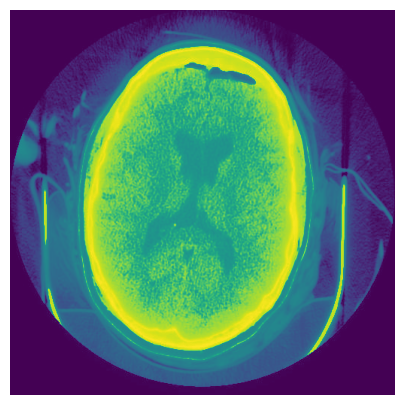

In [20]:
display(data)
plt.figure(figsize=(5,5));
plt.imshow(data[5].reshape(512,512));
plt.axis('off');

# Model Building on the 7 Categories

In [21]:
from sklearn.model_selection import train_test_split
y = final['category']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(279, 262144) (70, 262144) (279,) (70,)


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'sag', max_iter = 100, n_jobs = 7, verbose = 1)
clf.fit(X_train,y_train)
print("Logistic Regression Score: %.3f"%clf.score(X_test,y_test))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


max_iter reached after 321 seconds
Logistic Regression Score: 0.143


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:  5.3min finished


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[3 1 1 0 1 0 0]
 [2 1 3 0 2 2 1]
 [1 0 0 4 1 0 0]
 [4 0 1 1 0 1 2]
 [5 1 4 0 1 0 1]
 [1 2 5 0 1 1 3]
 [1 1 3 1 2 2 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.50      0.26         6
           1       0.17      0.09      0.12        11
           2       0.00      0.00      0.00         6
           3       0.17      0.11      0.13         9
           4       0.12      0.08      0.10        12
           5       0.17      0.08      0.11        13
           6       0.30      0.23      0.26        13

    accuracy                           0.14        70
   macro avg       0.16      0.16      0.14        70
weighted avg       0.17      0.14      0.14        70



## SVM

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Creating an instance of the SVM classifier with RBF kernel
svm_clf = SVC(kernel='rbf', verbose=True)  
# Fitting the SVM classifier to the training data
svm_clf.fit(X_train, y_train)
# Evaluating the classifier by checking the score on the test data
print("SVM Classifier Score: %.3f" % svm_clf.score(X_test, y_test))

[LibSVM]SVM Classifier Score: 0.157


In [25]:
# Predicting the Test set results
y_pred_svm = svm_clf.predict(X_test)
# Making the Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)

# Classification Report
cr_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(cr_svm)

Confusion Matrix:
[[2 0 3 0 1 0 0]
 [1 4 5 0 0 0 1]
 [0 1 2 1 2 0 0]
 [1 1 1 2 3 0 1]
 [3 3 4 1 0 0 1]
 [1 1 4 4 1 0 2]
 [1 0 3 2 6 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.40      0.36      0.38        11
           2       0.09      0.33      0.14         6
           3       0.20      0.22      0.21         9
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13
           6       0.17      0.08      0.11        13

    accuracy                           0.16        70
   macro avg       0.15      0.19      0.16        70
weighted avg       0.15      0.16      0.14        70



D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Building for the Normal/Non-normal Categories

In [26]:
final['label'] = (final['category'] != 0).astype(int)
print(final)

                   image_path             Image  any  epidural  \
0    renders/ID_000ada5fc.jpg  ID_000ada5fc.jpg    0         0   
1    renders/ID_002a132d3.jpg  ID_002a132d3.jpg    0         0   
2    renders/ID_002c3c44d.jpg  ID_002c3c44d.jpg    0         0   
3    renders/ID_00322d725.jpg  ID_00322d725.jpg    0         0   
4    renders/ID_00366aa47.jpg  ID_00366aa47.jpg    0         0   
..                        ...               ...  ...       ...   
344  renders/ID_fbd335a76.jpg  ID_fbd335a76.jpg    1         0   
345  renders/ID_fc39a9ae8.jpg  ID_fc39a9ae8.jpg    1         0   
346  renders/ID_fd608946a.jpg  ID_fd608946a.jpg    1         0   
347  renders/ID_fe4141c05.jpg  ID_fe4141c05.jpg    1         0   
348  renders/ID_ff473454b.jpg  ID_ff473454b.jpg    1         1   

     intraparenchymal  intraventricular  subarachnoid  subdural  category  \
0                   0                 0             0         0         0   
1                   0                 0             0

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, final['label'], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(279, 262144) (70, 262144) (279,) (70,)


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'sag', max_iter = 100, n_jobs = 7, verbose = 1)
clf.fit(X_train,y_train)
print("Logistic Regression Score: %.3f"%clf.score(X_test,y_test))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


max_iter reached after 56 seconds
Logistic Regression Score: 0.857


D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:   55.8s finished


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[ 2  4]
 [ 6 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.94      0.91      0.92        64

    accuracy                           0.86        70
   macro avg       0.59      0.62      0.60        70
weighted avg       0.88      0.86      0.87        70



## SVM

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Creating an instance of the SVM classifier with RBF kernel
svm_clf = SVC(kernel='rbf', verbose=True)  
# Fitting the SVM classifier to the training data
svm_clf.fit(X_train, y_train)
# Evaluating the classifier by checking the score on the test data
print("SVM Classifier Score: %.3f" % svm_clf.score(X_test, y_test))

[LibSVM]SVM Classifier Score: 0.900


In [31]:
# Predicting the Test set results
y_pred_svm = svm_clf.predict(X_test)
# Making the Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)

# Classification Report
cr_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(cr_svm)

Confusion Matrix:
[[ 0  6]
 [ 1 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      0.98      0.95        64

    accuracy                           0.90        70
   macro avg       0.46      0.49      0.47        70
weighted avg       0.83      0.90      0.87        70

